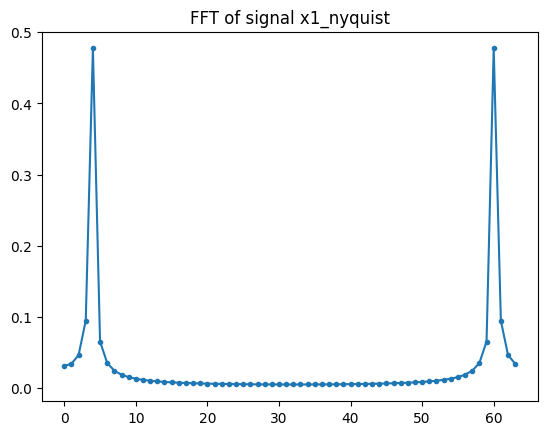

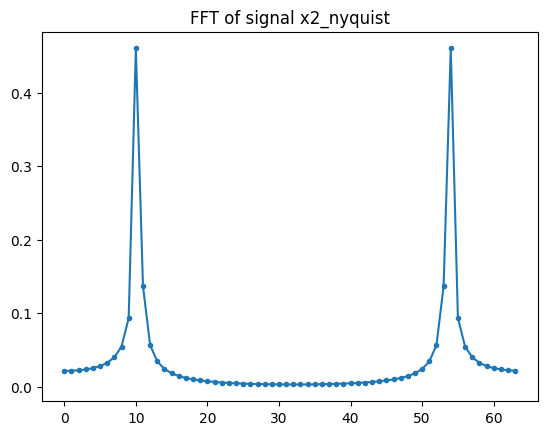

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 64 #no. of samples that will be taken
F1 = 300
F2 = 800
Fs = 500
Fs_nyquist = 5001 # just to see that F1 and F2 are retained after sampling
#lets take 50 samples each of signal F1 and F2
n = np.arange(N) # from 64 samples we will try to see where the signal lies after sampling
x1 = np.cos(2*np.pi*F1*n/Fs)
x1_nyquist = np.cos(2*np.pi*F1*n/Fs_nyquist)
dft_1 = np.fft.fft(x1)
dft_1 = abs(dft_1) / N
dft_1_nyquist = np.fft.fft(x1_nyquist)
dft_1_nyquist = abs(dft_1_nyquist) / N

x2 = np.cos(2*np.pi*F2*n/Fs)
x2_nyquist = np.cos(2*np.pi*F2*n/Fs_nyquist)
dft_2 = np.fft.fft(x2)
dft_2 = abs(dft_2) / N
dft_2_nyquist = np.fft.fft(x2_nyquist)
dft_2_nyquist = abs(dft_2_nyquist) / N

plt.figure()
#plt.xticks(n)
plt.plot(n,dft_1_nyquist , ".-")
plt.title('FFT of signal x1_nyquist')
plt.show()

plt.figure()
#plt.xticks(n)
plt.plot(n,dft_2_nyquist, ".-")
plt.title('FFT of signal x2_nyquist')
plt.show()


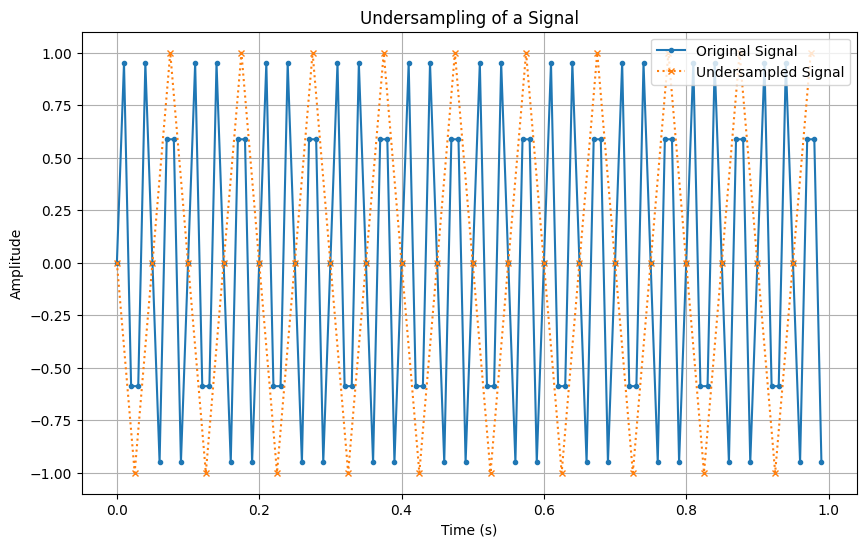

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal
fs = 100  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
f1 = 10  # Frequency of the signal (Hz)
f2 = 30
signal = np.sin(2*np.pi*f2*t)

# Undersample the signal
fs_new = 40  # New sampling frequency (Hz), less than 2*f2
t_new = np.arange(0, 1, 1/fs_new)
signal_undersampled =  np.sin(2*np.pi*f2*t_new)


# Plot the original and undersampled signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', marker='o', linestyle='-', markersize=3)
plt.plot(t_new, signal_undersampled, label='Undersampled Signal', marker='x', linestyle=':', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Undersampling of a Signal')
plt.legend()
plt.grid(True)
plt.show()

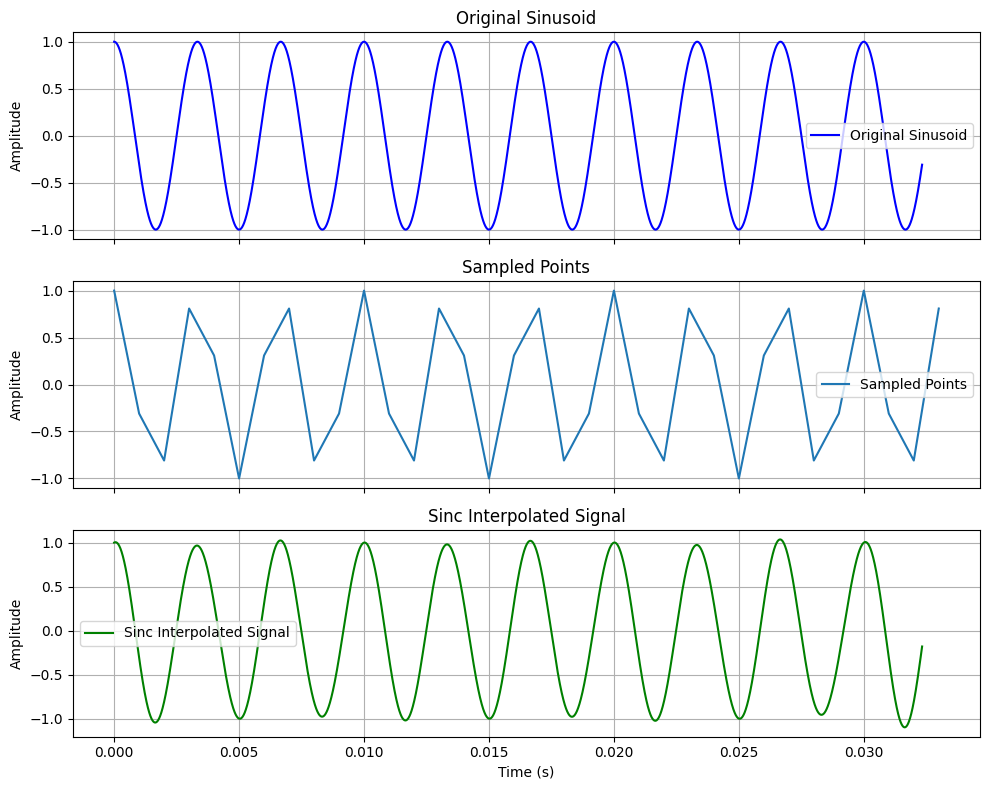

0.0009020543180047081


In [ ]:
#Fs = 800 Case-1 where sample points were taken from 0 to T-Ts

import numpy as np
import matplotlib.pyplot as plt

def sinc_interp(x_n, t_samples, t_interpolated, Ts):
  sinc_matrix = np.sinc((t_interpolated[:,None] - t_samples[None,:]) / Ts)
  return np.dot(sinc_matrix,x_n)

#parameters
Fs = 1000 # sampling frequency
Ts = 1/Fs # sampling period
F1 = 300 # signal frequency
duration = 10 * (1/F1) # signal will cover 10 cycles during this duration

t_samples = np.arange(0,duration,1/Fs) # 0 to duration - Ts
x_n = np.cos(2*np.pi*F1*t_samples) #sampled sequence

#time stamps at which we will be having our interpolated signals
t_interpolated = np.linspace(0,duration-Ts,5000) #total 5,000 time stamps
x_interpolated = sinc_interp(x_n , t_samples , t_interpolated , Ts)
x_original = np.cos(2*np.pi*F1*t_interpolated)

#plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(t_interpolated, x_original, label='Original Sinusoid', color='blue')
axs[0].set_title('Original Sinusoid')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t_samples, x_n, label='Sampled Points')
axs[1].set_title('Sampled Points')
axs[1].set_ylabel('Amplitude')
axs[1].legend()
axs[1].grid(True)

# Plot sinc interpolated signal
axs[2].plot(t_interpolated, x_interpolated, label='Sinc Interpolated Signal', color='green')
axs[2].set_title('Sinc Interpolated Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

Error = x_interpolated - x_original
Squared_Error = np.square(Error)
MSE = np.mean(Squared_Error)
print(MSE)

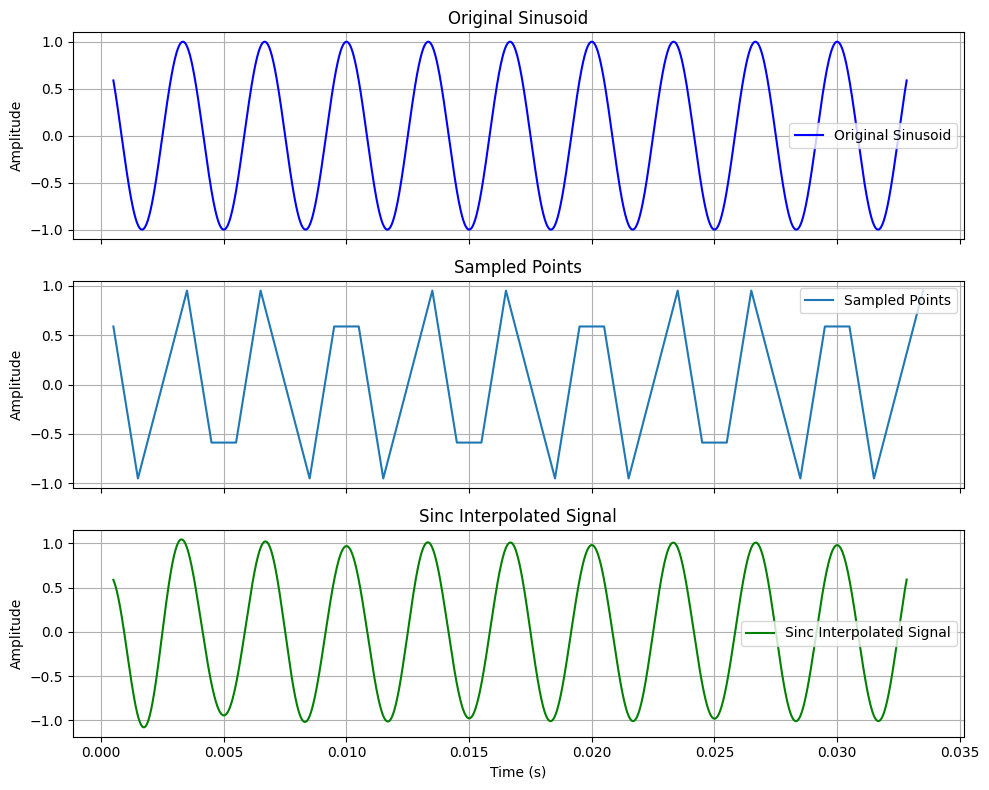

0.0012783946482050484


In [ ]:
#Fs = 800 Case-2 where sample points were taken from Ts/2 to T-Ts/2

import numpy as np
import matplotlib.pyplot as plt

def sinc_interp(x_n, t_samples, t_interpolated, Ts):
  sinc_matrix = np.sinc((t_interpolated[:,None] - t_samples[None,:]) / Ts)
  return np.dot(sinc_matrix,x_n)

#parameters
Fs = 1000 # sampling frequency
Ts = 1/Fs # sampling period
F1 = 300 # signal frequency
duration = 10 * (1/F1) # signal will cover 10 cycles during this duration

t_samples = np.arange(Ts/2,duration+Ts/2,1/Fs) # 0 to duration - Ts
x_n = np.cos(2*np.pi*F1*t_samples) #sampled sequence

#time stamps at which we will be having our interpolated signals
t_interpolated = np.linspace(Ts/2,duration-Ts/2,5000) #total 5,000 time stamps
x_interpolated = sinc_interp(x_n , t_samples , t_interpolated , Ts)
x_original = np.cos(2*np.pi*F1*t_interpolated)

#plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(t_interpolated, x_original, label='Original Sinusoid', color='blue')
axs[0].set_title('Original Sinusoid')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t_samples, x_n, label='Sampled Points')
axs[1].set_title('Sampled Points')
axs[1].set_ylabel('Amplitude')
axs[1].legend()
axs[1].grid(True)

# Plot sinc interpolated signal
axs[2].plot(t_interpolated, x_interpolated, label='Sinc Interpolated Signal', color='green')
axs[2].set_title('Sinc Interpolated Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

Error = x_interpolated - x_original
Squared_Error = np.square(Error)
MSE = np.mean(Squared_Error)
print(MSE)

In [ ]:
t_samples

array([0.000625, 0.001875, 0.003125, 0.004375, 0.005625, 0.006875,
       0.008125, 0.009375, 0.010625, 0.011875, 0.013125, 0.014375,
       0.015625, 0.016875, 0.018125, 0.019375, 0.020625, 0.021875,
       0.023125, 0.024375, 0.025625, 0.026875, 0.028125, 0.029375,
       0.030625, 0.031875, 0.033125])